In [1]:
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
load_dotenv()  # loads .env file

db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_name = os.getenv('DB_NAME')

In [3]:
connection_string = f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}'
engine = create_engine(connection_string)

In [4]:
# Verificar quais tabelas existem no schema precificacao
query_tables = """
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = 'precificacao'
ORDER BY table_name;
"""
tables_df = pd.read_sql(query_tables, engine)
print("Tabelas disponíveis no schema 'precificacao':")
print(tables_df)

Tabelas disponíveis no schema 'precificacao':
           table_name
0     precificacao_al
1     precificacao_ba
2     precificacao_ce
3  precificacao_geral
4     precificacao_ma
5     precificacao_pb
6     precificacao_pe
7     precificacao_pi
8     precificacao_rn
9     precificacao_se


In [5]:
# Versão melhorada: Une todas as tabelas dinamicamente
try:
    # Lista de todas as tabelas de estados (baseado no que vimos)
    estados = ['al', 'ba', 'ce', 'ma', 'pb', 'pe', 'pi', 'rn', 'se']
    
    # Gerar query UNION ALL dinamicamente
    union_queries = [
        f"SELECT * FROM precificacao.precificacao_{estado}"
        for estado in estados
    ]
    query = "\n    UNION ALL\n    ".join(union_queries) + ";"
    
    print(f"Unindo {len(estados)} tabelas: {', '.join([f'precificacao_{e}' for e in estados])}\n")
    
    # Executar query
    df = pd.read_sql(query, engine)
    
    print(f"✓ Carregados {len(df):,} registros")
    print(f"✓ Estados incluídos: {sorted(df['SIGLA_UF'].unique().tolist()) if 'SIGLA_UF' in df.columns else 'N/A'}")
    
finally:
    engine.dispose()  # Fechar conexões

Unindo 9 tabelas: precificacao_al, precificacao_ba, precificacao_ce, precificacao_ma, precificacao_pb, precificacao_pe, precificacao_pi, precificacao_rn, precificacao_se

✓ Carregados 1,794 registros
✓ Estados incluídos: ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']


In [6]:
df

,fid,geom,CD_MUN,NM_MUN,SIGLA_UF,ckey,populacao,nota_veg,nota_area,nota_relevo,...,perimetro_total_car,perimetro_medio_car,area_max_perim,nota_total_q1,nota_total_q2,nota_total_q3,nota_total_q4,nota_media,valor_mun_perim,valor_mun_area
0,1,0106000020F816000001000000010300000001000000E0...,2708600,sao miguel dos campos,AL,sao miguel dos campos al,51783.0,2.299257,2.218568,2.5,...,1303.05896,7.99423,508.561424,15.0,20.0,16.0,17.0,17.0,1.168883e+06,2.055331e+06
1,2,0106000020F816000001000000010300000001000000E8...,2701407,campo alegre,AL,campo alegre al,32010.0,2.135962,2.435687,2.5,...,835.39556,5.06300,203.988644,14.0,19.0,15.0,16.0,16.0,7.493749e+05,1.919425e+06
2,3,0106000020F816000001000000010300000001000000F7...,2700102,agua branca,AL,agua branca al,19003.0,2.464780,4.905586,2.5,...,2458.05144,1.32796,14.033310,16.0,19.0,16.0,19.0,18.0,2.204946e+06,2.903588e+06
3,4,0106000020F816000001000000010300000001000000C1...,2703205,igreja nova,AL,igreja nova al,21371.0,2.150606,7.902442,4.5,...,6685.55773,1.14636,10.457604,21.0,26.0,22.0,23.0,23.0,5.997146e+06,2.619055e+06
4,5,0106000020F81600000100000001030000000100000075...,2709103,taquarana,AL,taquarana al,18968.0,2.146185,7.834302,4.5,...,1493.34330,0.92870,6.863427,21.0,26.0,22.0,23.0,23.0,1.339574e+06,9.217572e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,65,0106000020F81600000100000001030000000100000092...,2806107,rosario do catete,SE,rosario do catete se,9275.0,2.286546,1.002461,4.5,...,401.76144,3.24001,83.537762,14.0,19.0,15.0,16.0,16.0,3.603921e+05,6.260449e+05
1790,66,0106000020F8160000010000000103000000010000003D...,2803906,malhador,SE,malhador se,11523.0,2.487554,5.131174,7.5,...,951.36734,1.08356,9.343209,25.0,30.0,26.0,27.0,27.0,1.495207e+06,1.084842e+06
1791,67,0106000020F8160000010000000103000000010000005C...,2807402,tobias barreto,SE,tobias barreto se,50267.0,2.231050,5.055400,2.5,...,9835.74106,1.51974,18.379290,16.0,20.0,17.0,18.0,18.0,8.822955e+06,6.313287e+06
1792,68,0106000020F816000001000000010300000001000000CC...,2802601,graccho cardoso,SE,graccho cardoso se,5821.0,2.127238,4.755253,4.5,...,2445.39560,1.63135,21.177975,18.0,22.0,19.0,20.0,20.0,2.193593e+06,1.512191e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fid                  1794 non-null   int64  
 1   geom                 1794 non-null   object 
 2   CD_MUN               1794 non-null   int64  
 3   NM_MUN               1794 non-null   object 
 4   SIGLA_UF             1794 non-null   object 
 5   ckey                 1794 non-null   object 
 6   populacao            1794 non-null   float64
 7   nota_veg             1793 non-null   float64
 8   nota_area            1792 non-null   float64
 9   nota_relevo          1794 non-null   float64
 10  nota_p_q1            1794 non-null   float64
 11  nota_p_q2            1794 non-null   float64
 12  nota_p_q3            1794 non-null   float64
 13  nota_p_q4            1794 non-null   float64
 14  nota_insalub         1794 non-null   float64
 15  nota_insalub_2       1794 non-null   f

In [8]:
df_temp = df.copy()

In [9]:
df.columns

Index(['fid', 'geom', 'CD_MUN', 'NM_MUN', 'SIGLA_UF', 'ckey', 'populacao',
       'nota_veg', 'nota_area', 'nota_relevo', 'nota_p_q1', 'nota_p_q2',
       'nota_p_q3', 'nota_p_q4', 'nota_insalub', 'nota_insalub_2',
       'area_cidade', 'area_georef', 'percent_area_georef', 'num_imoveis',
       'area_car_total', 'area_car_media', 'perimetro_total_car',
       'perimetro_medio_car', 'area_max_perim', 'nota_total_q1',
       'nota_total_q2', 'nota_total_q3', 'nota_total_q4', 'nota_media',
       'valor_mun_perim', 'valor_mun_area'],
      dtype='object')

In [10]:
df_temp = df_temp[['fid', 'CD_MUN', 'NM_MUN', 'SIGLA_UF', 'ckey', 'populacao',
       'nota_veg', 'nota_area', 'nota_relevo', 'nota_p_q1', 'nota_p_q2',
       'nota_p_q3', 'nota_p_q4', 'nota_insalub', 'nota_insalub_2',
       'area_cidade', 'area_georef', 'percent_area_georef', 'num_imoveis',
       'area_car_total', 'area_car_media', 'perimetro_total_car',
       'perimetro_medio_car', 'area_max_perim', 'nota_total_q1',
       'nota_total_q2', 'nota_total_q3', 'nota_total_q4', 'nota_media',
       'valor_mun_perim', 'valor_mun_area']]

In [11]:
df_temp.head()

,fid,CD_MUN,NM_MUN,SIGLA_UF,ckey,populacao,nota_veg,nota_area,nota_relevo,nota_p_q1,...,perimetro_total_car,perimetro_medio_car,area_max_perim,nota_total_q1,nota_total_q2,nota_total_q3,nota_total_q4,nota_media,valor_mun_perim,valor_mun_area
0,1,2708600,sao miguel dos campos,AL,sao miguel dos campos al,51783.0,2.299257,2.218568,2.5,4.546304,...,1303.05896,7.99423,508.561424,15.0,20.0,16.0,17.0,17.0,1.168883e+06,2.055331e+06
1,2,2701407,campo alegre,AL,campo alegre al,32010.0,2.135962,2.435687,2.5,4.533966,...,835.39556,5.06300,203.988644,14.0,19.0,15.0,16.0,16.0,7.493749e+05,1.919425e+06
2,3,2700102,agua branca,AL,agua branca al,19003.0,2.464780,4.905586,2.5,4.617391,...,2458.05144,1.32796,14.033310,16.0,19.0,16.0,19.0,18.0,2.204946e+06,2.903588e+06
3,4,2703205,igreja nova,AL,igreja nova al,21371.0,2.150606,7.902442,4.5,4.508174,...,6685.55773,1.14636,10.457604,21.0,26.0,22.0,23.0,23.0,5.997146e+06,2.619055e+06
4,5,2709103,taquarana,AL,taquarana al,18968.0,2.146185,7.834302,4.5,4.540257,...,1493.34330,0.92870,6.863427,21.0,26.0,22.0,23.0,23.0,1.339574e+06,9.217572e+05


In [12]:
df.describe()

,fid,CD_MUN,populacao,nota_veg,nota_area,nota_relevo,nota_p_q1,nota_p_q2,nota_p_q3,nota_p_q4,...,perimetro_total_car,perimetro_medio_car,area_max_perim,nota_total_q1,nota_total_q2,nota_total_q3,nota_total_q4,nota_media,valor_mun_perim,valor_mun_area
count,1794.000000,1.794000e+03,1.794000e+03,1793.000000,1792.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,...,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1.794000e+03,1.794000e+03
mean,121.147157,2.520820e+06,3.037138e+04,4.490564,4.149020,4.301561,5.952883,5.962972,3.824836,6.082805,...,3668.471736,2.389278,61.140934,21.194537,21.196767,19.054627,21.309922,20.700111,3.430792e+06,4.889547e+06
std,91.892245,2.858652e+05,1.075156e+05,2.304596,2.026894,1.935859,1.695379,2.726114,1.687694,1.272647,...,4094.423313,1.405578,92.415152,3.814370,4.528373,4.083529,3.722655,3.737381,3.755393e+06,7.255790e+06
min,1.000000,2.100055e+06,1.313000e+03,2.026413,1.000000,1.500000,2.544447,0.596241,0.044794,2.017844,...,0.000000,0.000000,0.000000,12.000000,9.000000,8.000000,12.000000,11.000000,0.000000e+00,0.000000e+00
25%,50.000000,2.300717e+06,7.207250e+03,2.377943,2.725091,2.500000,4.615112,3.732367,2.608166,5.425042,...,1161.679800,1.419367,16.031710,19.000000,18.000000,16.000000,19.000000,18.000000,1.126561e+06,1.263551e+06
50%,103.000000,2.508456e+06,1.378000e+04,5.527321,2.931440,4.500000,5.214089,6.380669,4.419929,5.938208,...,2350.642535,2.037070,33.021924,21.000000,21.000000,19.000000,21.000000,20.000000,2.252707e+06,2.609580e+06
75%,167.000000,2.804496e+06,2.457525e+04,5.820506,4.878615,4.500000,7.365054,8.317602,5.217158,6.692979,...,4731.979592,3.012090,72.198196,23.000000,24.000000,21.750000,23.000000,23.000000,4.399172e+06,5.716914e+06
max,417.000000,2.933604e+06,2.424880e+06,9.869525,9.541595,7.500000,10.000000,10.000000,6.319625,10.000000,...,35901.767640,14.209810,1606.817962,38.000000,42.000000,38.000000,38.000000,39.000000,3.444246e+07,7.908256e+07


In [13]:
# 1. Verificar outliers
df.describe().T[['mean', 'std', 'min', 'max']]


,mean,std,min,max
fid,1.211472e+02,9.189224e+01,1.000000e+00,4.170000e+02
CD_MUN,2.520820e+06,2.858652e+05,2.100055e+06,2.933604e+06
populacao,3.037138e+04,1.075156e+05,1.313000e+03,2.424880e+06
nota_veg,4.490564e+00,2.304596e+00,2.026413e+00,9.869525e+00
nota_area,4.149020e+00,2.026894e+00,1.000000e+00,9.541595e+00
nota_relevo,4.301561e+00,1.935859e+00,1.500000e+00,7.500000e+00
nota_p_q1,5.952883e+00,1.695379e+00,2.544447e+00,1.000000e+01
nota_p_q2,5.962972e+00,2.726114e+00,5.962409e-01,1.000000e+01
nota_p_q3,3.824836e+00,1.687694e+00,4.479406e-02,6.319625e+00
nota_p_q4,6.082805e+00,1.272647e+00,2.017844e+00,1.000000e+01


In [14]:
# Verificar quais estados/tabelas estão no df atual
print("🔍 VERIFICAÇÃO DO DATAFRAME ATUAL")
print("=" * 60)
print(f"\n📊 Total de registros no df: {len(df):,}")
print(f"\n🗺️  Estados únicos no df:")
if 'SIGLA_UF' in df.columns:
    estados_no_df = df['SIGLA_UF'].value_counts().sort_index()
    print(estados_no_df)
    print(f"\n✅ Total de estados no df: {len(estados_no_df)}")
    
    # Comparar com as tabelas que deveriam estar
    estados_codigo = ['al', 'ba', 'ce', 'ma', 'pb', 'pe', 'pi', 'rn', 'se']
    estados_esperados = [e.upper() for e in estados_codigo]
    
    print(f"\n🎯 Estados esperados (9 estados do Nordeste): {', '.join(estados_esperados)}")
    print(f"📋 Estados carregados no df: {', '.join(sorted(df['SIGLA_UF'].unique()))}")
    
    estados_faltando = set(estados_esperados) - set(df['SIGLA_UF'].unique())
    if estados_faltando:
        print(f"\n⚠️  ATENÇÃO: Estados faltando no df: {', '.join(sorted(estados_faltando))}")
        print("   💡 Você precisa reexecutar a célula 5 para carregar todas as tabelas!")
    else:
        print(f"\n✅ PERFEITO! Todos os 9 estados do Nordeste estão no df!")
        print("   O df contém dados de TODAS as tabelas de precificação disponíveis")
        print("   (excluindo precificacao_geral como solicitado)")
else:
    print("   ⚠️  Coluna SIGLA_UF não encontrada")

🔍 VERIFICAÇÃO DO DATAFRAME ATUAL

📊 Total de registros no df: 1,794

🗺️  Estados únicos no df:
SIGLA_UF
AL    102
BA    417
CE    184
MA    217
PB    223
PE    185
PI    224
RN    167
SE     75
Name: count, dtype: int64

✅ Total de estados no df: 9

🎯 Estados esperados (9 estados do Nordeste): AL, BA, CE, MA, PB, PE, PI, RN, SE
📋 Estados carregados no df: AL, BA, CE, MA, PB, PE, PI, RN, SE

✅ PERFEITO! Todos os 9 estados do Nordeste estão no df!
   O df contém dados de TODAS as tabelas de precificação disponíveis
   (excluindo precificacao_geral como solicitado)


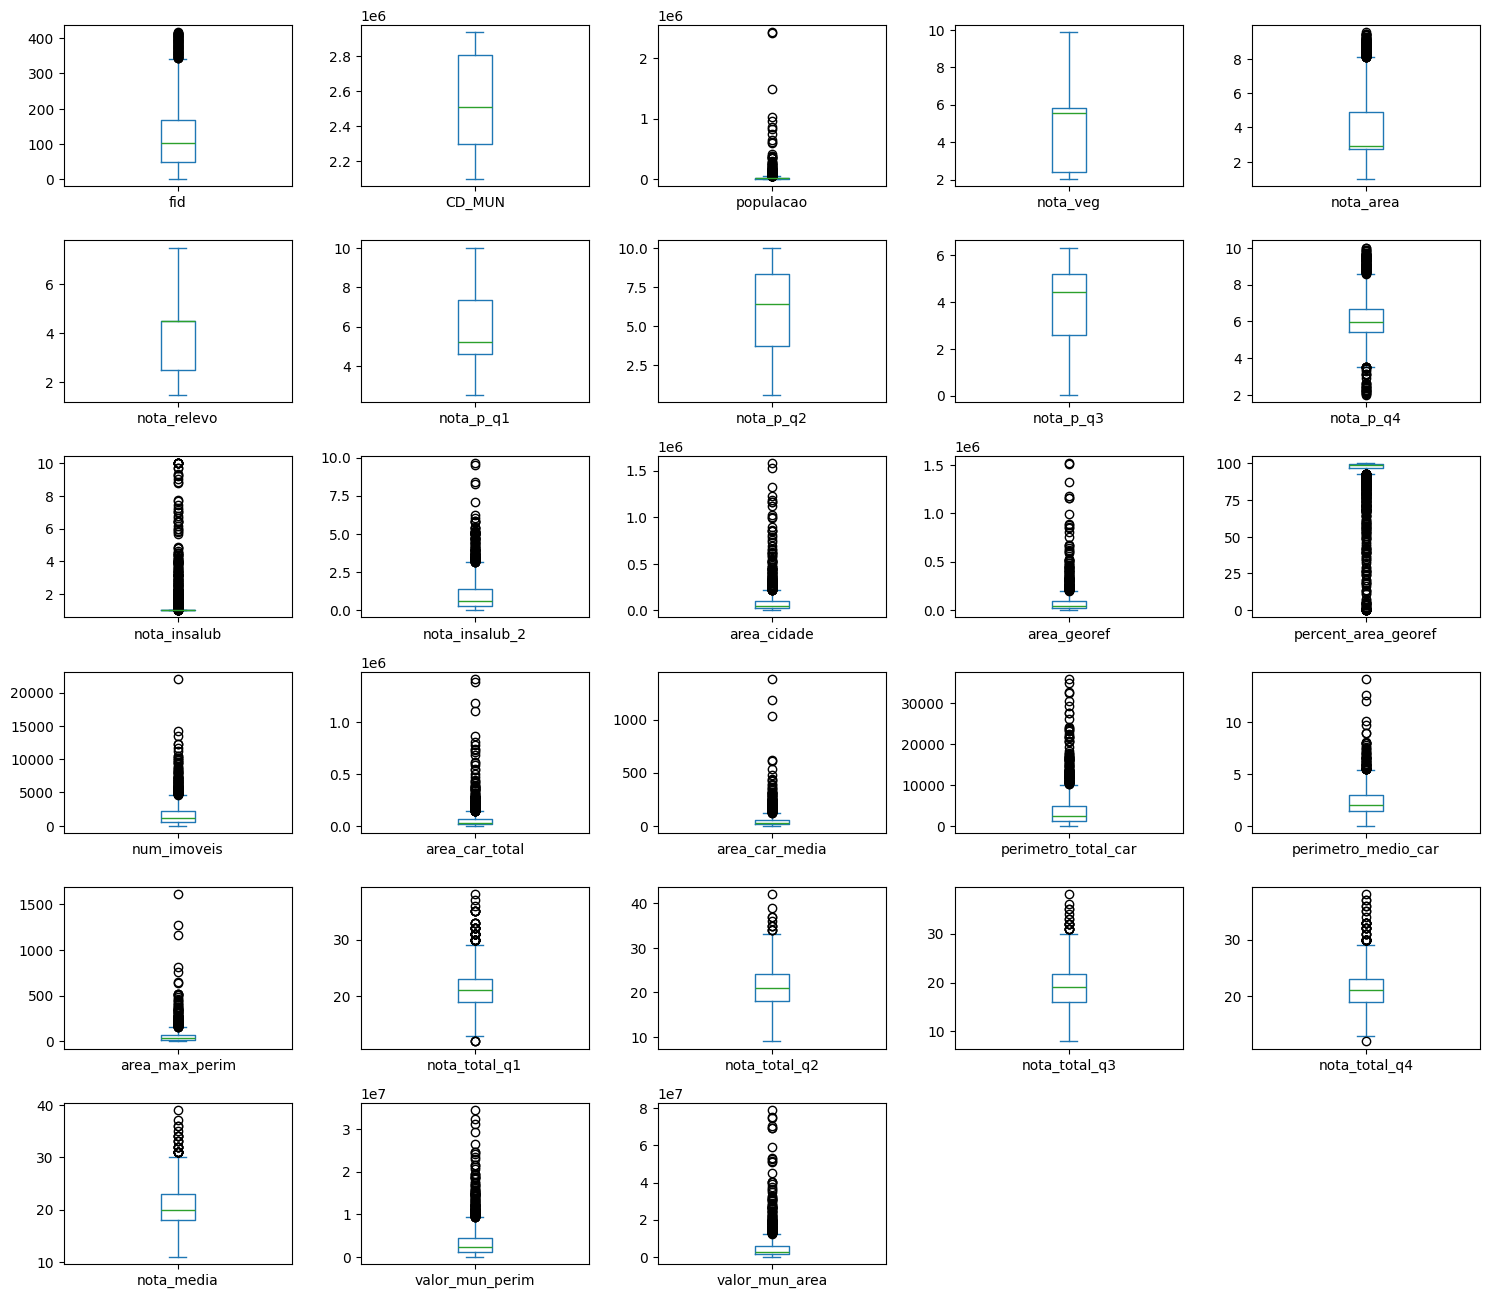

In [15]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(7,5), figsize=(15,15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

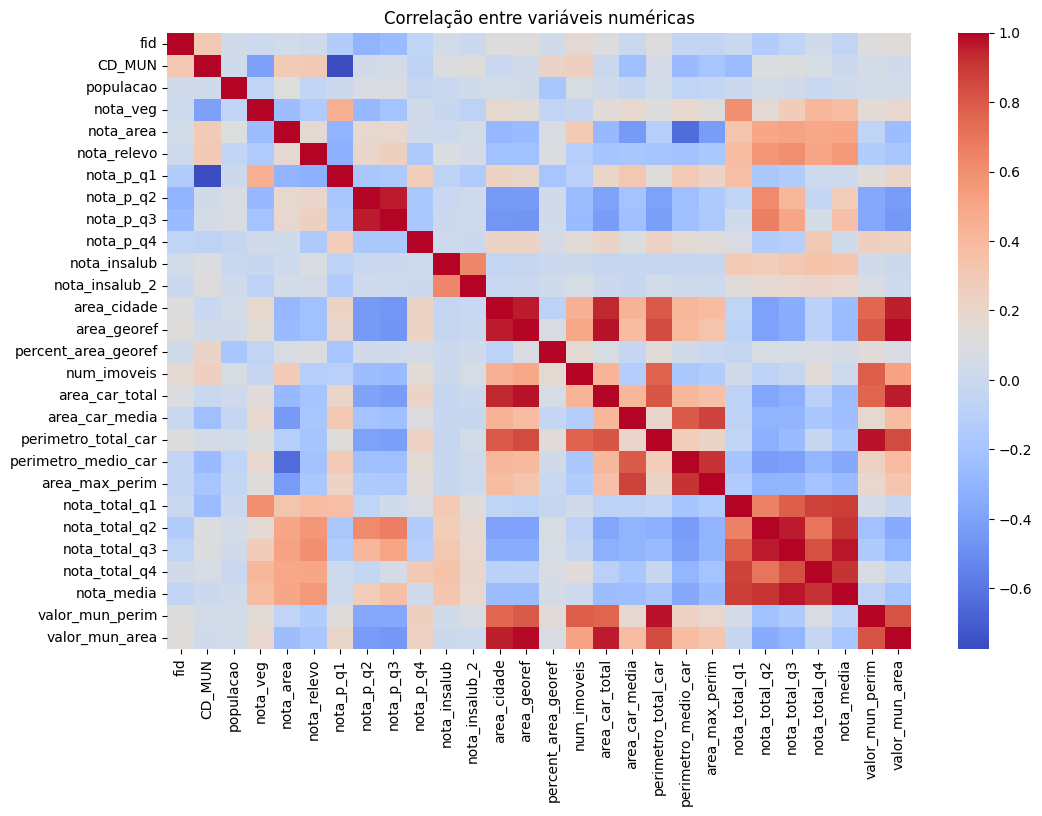

In [16]:
# 3. Correlação entre variáveis numéricas
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Correlação entre variáveis numéricas')
plt.show()


In [17]:
# 📊 Análise de Cobertura de Georreferenciamento (percent_area_georef)
print("=" * 80)
print("📊 ANÁLISE: Municípios por faixa de percent_area_georef")
print("=" * 80)

# Thresholds importantes
thresholds = [30, 15, 5, 1, 0]
total_municipios = len(df)

print(f"\n🏛️  Total de municípios: {total_municipios:,}\n")
print("Threshold | Municípios | % Total ")
print("-" * 50)

for threshold in thresholds:
    if threshold == 0:
        municipios = df[df['percent_area_georef'] == 0].shape[0]
        print(f"    = {threshold}%   |     {municipios:3d}    |  {municipios/total_municipios*100:5.2f}%")
    else:
        municipios = df[df['percent_area_georef'] < threshold].shape[0]
        print(f"   < {threshold:2d}%   |     {municipios:3d}    |  {municipios/total_municipios*100:5.2f}%")

print("-" * 50)

# Estatísticas gerais
print(f"\n📈 Estatísticas Gerais:")
print(f"   • Média: {df['percent_area_georef'].mean():.1f}%  |  Mediana: {df['percent_area_georef'].median():.1f}%")

# Top 3 estados mais afetados
df_baixo = df[df['percent_area_georef'] < 30].copy()
if len(df_baixo) > 0:
    estados_count = df_baixo['SIGLA_UF'].value_counts().head(3)
    print(f"\n🎯 Estados com mais municípios < 30%:")
    for i, (estado, count) in enumerate(estados_count.items(), 1):
        total_estado = len(df[df['SIGLA_UF'] == estado])
        print(f"   {i}. {estado}: {count} municípios ({count/total_estado*100:.1f}% do estado)")

print("=" * 80)

📊 ANÁLISE: Municípios por faixa de percent_area_georef

🏛️  Total de municípios: 1,794

Threshold | Municípios | % Total 
--------------------------------------------------
   < 30%   |      57    |   3.18%
   < 15%   |      40    |   2.23%
   <  5%   |      30    |   1.67%
   <  1%   |      15    |   0.84%
    = 0%   |       8    |   0.45%
--------------------------------------------------

📈 Estatísticas Gerais:
   • Média: 92.8%  |  Mediana: 99.1%

🎯 Estados com mais municípios < 30%:
   1. MA: 22 municípios (10.1% do estado)
   2. PI: 18 municípios (8.0% do estado)
   3. CE: 12 municípios (6.5% do estado)


In [18]:
# Municípios críticos (com menor cobertura)
print("\n⚠️  MUNICÍPIOS COM MENOR COBERTURA DE GEORREFERENCIAMENTO")
print("=" * 80)

# Municípios com 0%
df_zero = df[df['percent_area_georef'] == 0][['SIGLA_UF', 'NM_MUN', 'num_imoveis']]
if len(df_zero) > 0:
    print(f"\n🔴 Municípios com 0% georreferenciado ({len(df_zero)} no total):")
    for idx, row in df_zero.iterrows():
        print(f"   • {row['NM_MUN']}/{row['SIGLA_UF']} - {int(row['num_imoveis'])} imóveis")

# Top 5 piores (não-zero)
print(f"\n📉 Top 5 com menor % (excluindo 0%):")
top5_menor = df[df['percent_area_georef'] > 0].nsmallest(5, 'percent_area_georef')[
    ['SIGLA_UF', 'NM_MUN', 'percent_area_georef', 'num_imoveis']
]
for idx, row in top5_menor.iterrows():
    print(f"   • {row['NM_MUN']}/{row['SIGLA_UF']}: {row['percent_area_georef']:.2f}% - {int(row['num_imoveis'])} imóveis")

print("\n" + "=" * 80)
print(f"✅ RESUMO: {len(df[df['percent_area_georef'] >= 50])} municípios ({len(df[df['percent_area_georef'] >= 50])/len(df)*100:.1f}%) têm cobertura ≥ 50%")
print("=" * 80)


⚠️  MUNICÍPIOS COM MENOR COBERTURA DE GEORREFERENCIAMENTO

🔴 Municípios com 0% georreferenciado (8 no total):
   • fernando de noronha/PE - 0 imóveis
   • cocal dos alves/PI - 0 imóveis
   • cajueiro da praia/PI - 0 imóveis
   • lagoa de sao francisco/PI - 0 imóveis
   • caraubas do piaui/PI - 0 imóveis
   • sao jose do divino/PI - 0 imóveis
   • ilha grande/PI - 0 imóveis
   • piracuruca/PI - 2 imóveis

📉 Top 5 com menor % (excluindo 0%):
   • vicosa do ceara/CE: 0.02% - 11 imóveis
   • centro do guilherme/MA: 0.14% - 13 imóveis
   • nova olinda do maranhao/MA: 0.23% - 11 imóveis
   • marcacao/PB: 0.38% - 2 imóveis
   • santa luzia do parua/MA: 0.41% - 39 imóveis

✅ RESUMO: 1713 municípios (95.5%) têm cobertura ≥ 50%
